In [1]:
import os
import random

import numpy as np

from sklearn.manifold import TSNE, Isomap
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

from models import *

In [2]:
plt.rcParams["figure.figsize"] = (15, 20)

In [3]:
# first, read in the nouns
with open("data/2000_nouns_sorted.txt") as reader:
    nouns = reader.read().split("\n")
    # strip whitespace
    nouns = list(map(lambda _:_.strip(), nouns))
nouns[:5]

['dollar', 'formula', 'pound', 'quote', 'ability']

In [4]:
# we load only the embeddings we want, and store them back to reuse
def read_model(model_name):
    pkl_file = "./models/2000_nouns_{}.pkl".format(model_name)
    if not os.path.exists(pkl_file):
        print("Model doesn't exist, creating it")
        word_index, embeddings = read_embedding_file("./data/{}.bz2".format(model_name), selected_words=nouns)
        sim = WordSimilarityModel(word_index, embeddings)
        pkl.dump(sim, open(pkl_file, "wb"))
        return sim
    return pkl.load(open(pkl_file, "rb"))

bow2_sim = read_model("bow2.words")
bow5_sim = read_model("bow5.words")
deps_sim = read_model("deps.words")

all_sim = [bow2_sim, bow5_sim, deps_sim]

Model doesn't exist, creating it
Read 0 lines
Read 10000 lines
Read 20000 lines
Read 30000 lines
Read 40000 lines
Read 50000 lines
Read 60000 lines
Read 70000 lines
Read 80000 lines
Read 90000 lines
Read 100000 lines
Read 110000 lines
Read 120000 lines
Read 130000 lines
Read 140000 lines
Read 150000 lines
Read 160000 lines
Read 170000 lines
Read 180000 lines
Model doesn't exist, creating it
Read 0 lines
Read 10000 lines
Read 20000 lines
Read 30000 lines
Read 40000 lines
Read 50000 lines
Read 60000 lines
Read 70000 lines
Read 80000 lines
Read 90000 lines
Read 100000 lines
Read 110000 lines
Read 120000 lines
Read 130000 lines
Read 140000 lines
Read 150000 lines
Read 160000 lines
Read 170000 lines
Read 180000 lines
Model doesn't exist, creating it
Read 0 lines
Read 10000 lines
Read 20000 lines
Read 30000 lines
Read 40000 lines
Read 50000 lines
Read 60000 lines
Read 70000 lines
Read 80000 lines
Read 90000 lines
Read 100000 lines
Read 110000 lines
Read 120000 lines
Read 130000 lines
Read 14

In [5]:
def reduce_dim(nouns, model, method):
    np.random.seed(42)
    if method not in {"tsne", "isomap"}: raise ValueError() ;
    
    words, matrix = model.get_word_index_matrix()
        
    if method == "tsne":
        print("Using t-SNE")
        # TSNE can't handle large dimensions, so use PCA to project it to 50-dim space
        print("Projecting to 50-dim space using PCA")
        pca = PCA(n_components=50)
        matrix_transformed = pca.fit_transform(matrix)
        print("\t... done")
        
        print("Performing t-SNE")
        tsne = TSNE(n_components=2)
        matrix_viz = tsne.fit_transform(matrix_transformed)
        print("\t... done")
        
        # TODO down-sample
        plt.scatter(matrix_viz[:, 0], matrix_viz[:, 1])
        return words, matrix_viz
    
    else:
        print("Using Isomap")
        isomap = Isomap(n_neighbors=5, n_components=2)
        matrix_viz = isomap.fit_transform(matrix)
        print("\t... done")
        
        # TODO down-sample
        plt.scatter(matrix_viz[:, 0], matrix_viz[:, 1])
        return words, matrix_viz
        

In [22]:
def plot_word_clusters(words, lowdim, n_words=250, alpha=0.4, margin=5):
    np.random.seed(42)
    word_idx = list(zip(words, np.arange(len(words))))
    plt.figure(figsize=(20, 20))

    for _ in np.arange(n_words):
        word, idx = random.choice(word_idx)
        x, y = lowdim[idx]
        plt.text(x, y, word, alpha=alpha)


    plt.xlim(lowdim[:, 0].min() - margin, lowdim[:, 0].max() + margin)
    plt.ylim(lowdim[:, 1].min() - margin, lowdim[:, 1].max() + margin)
    plt.xticks([])
    plt.yticks([])

Using t-SNE
Projecting to 50-dim space using PCA
	... done
Performing t-SNE
	... done


Text(0.5,1,'t-SNE on BOW-2')

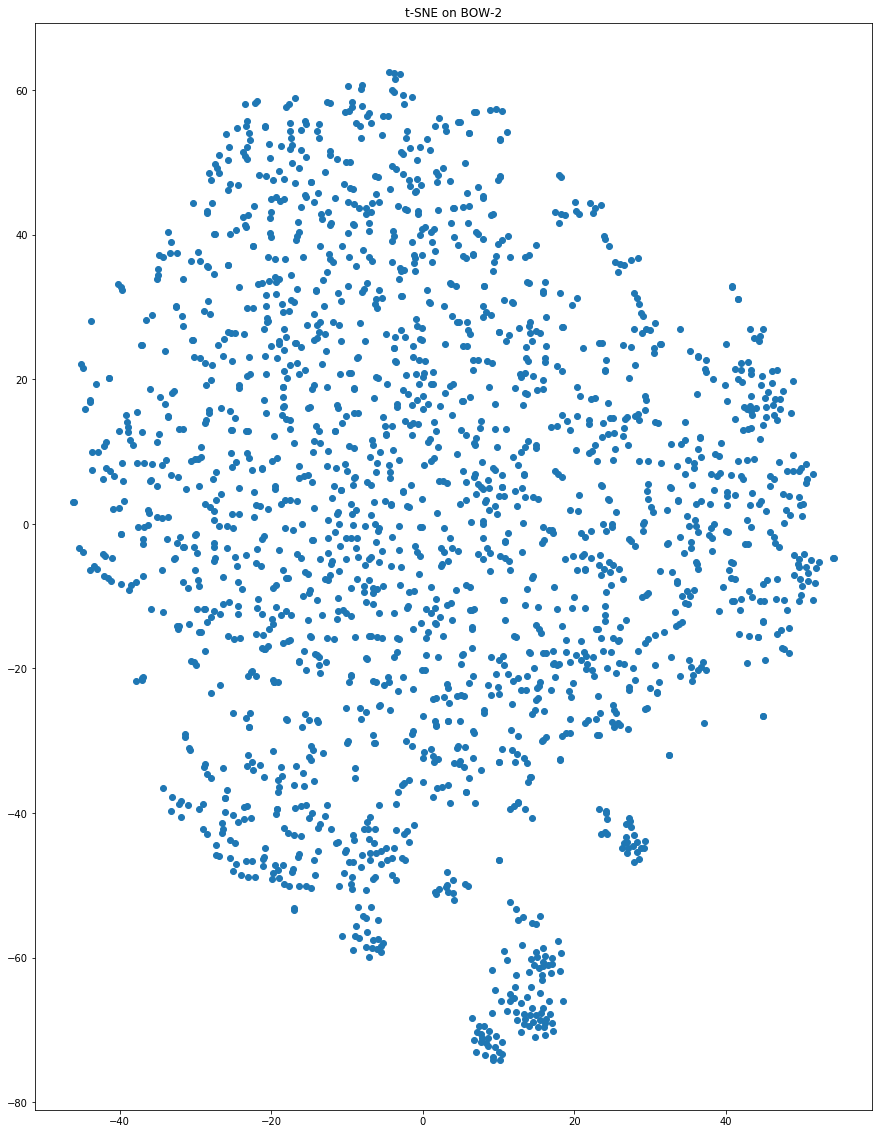

In [16]:
words_tsne, lowdim_tsne = reduce_dim(nouns, bow2_sim, "tsne")
plt.title("t-SNE on BOW-2")

Text(0.5,1,'BOW-2: Word Clusters - 250 words')

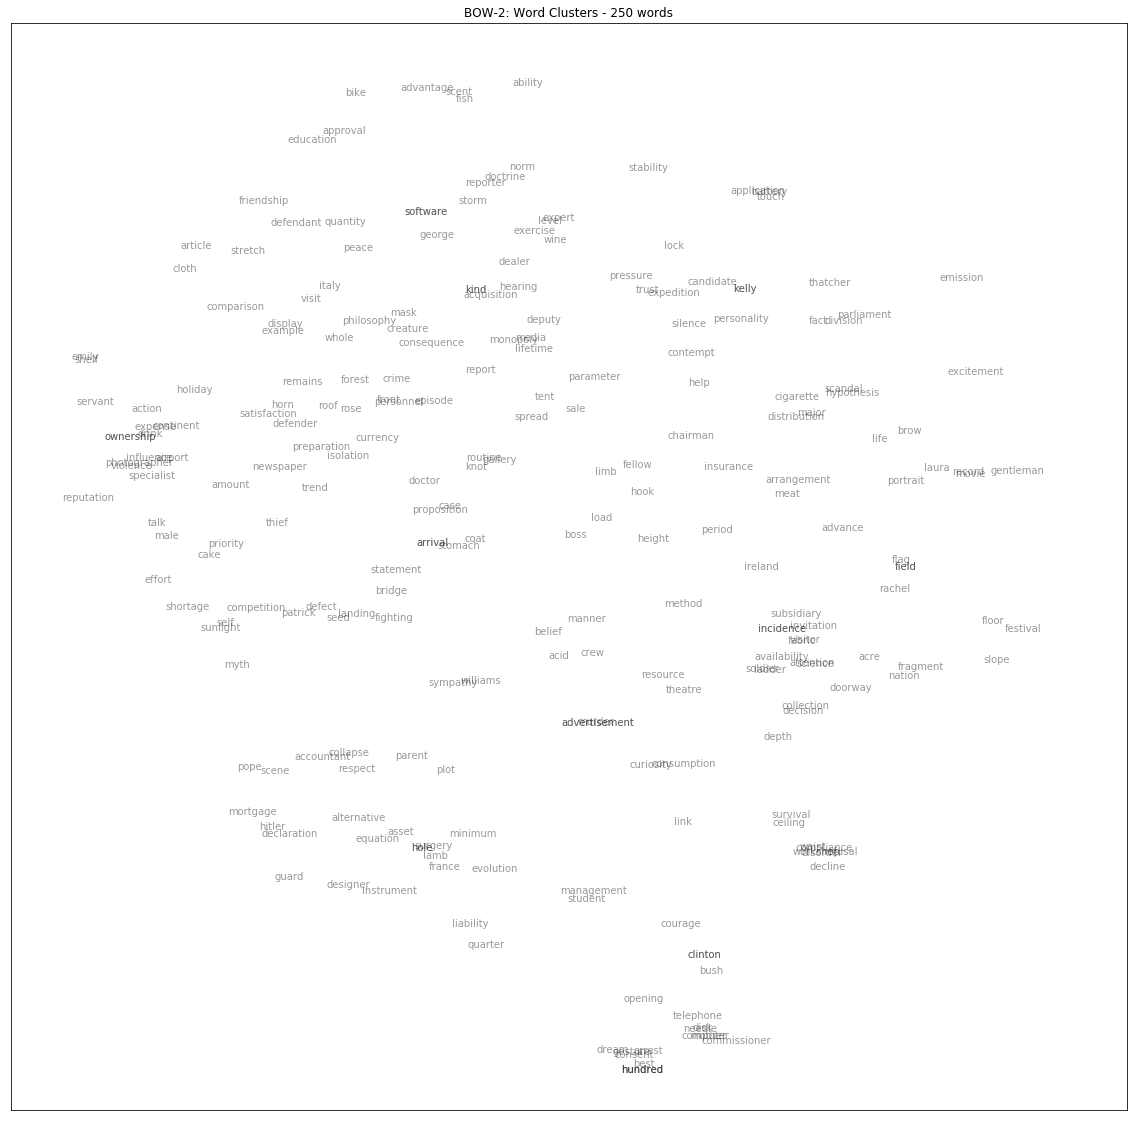

In [23]:
plot_word_clusters(words_tsne, lowdim_tsne, n_words=250)
plt.title("BOW-2: Word Clusters - 250 words")

Using t-SNE
Projecting to 50-dim space using PCA
	... done
Performing t-SNE
	... done


Text(0.5,1,'t-SNE on BOW-5')

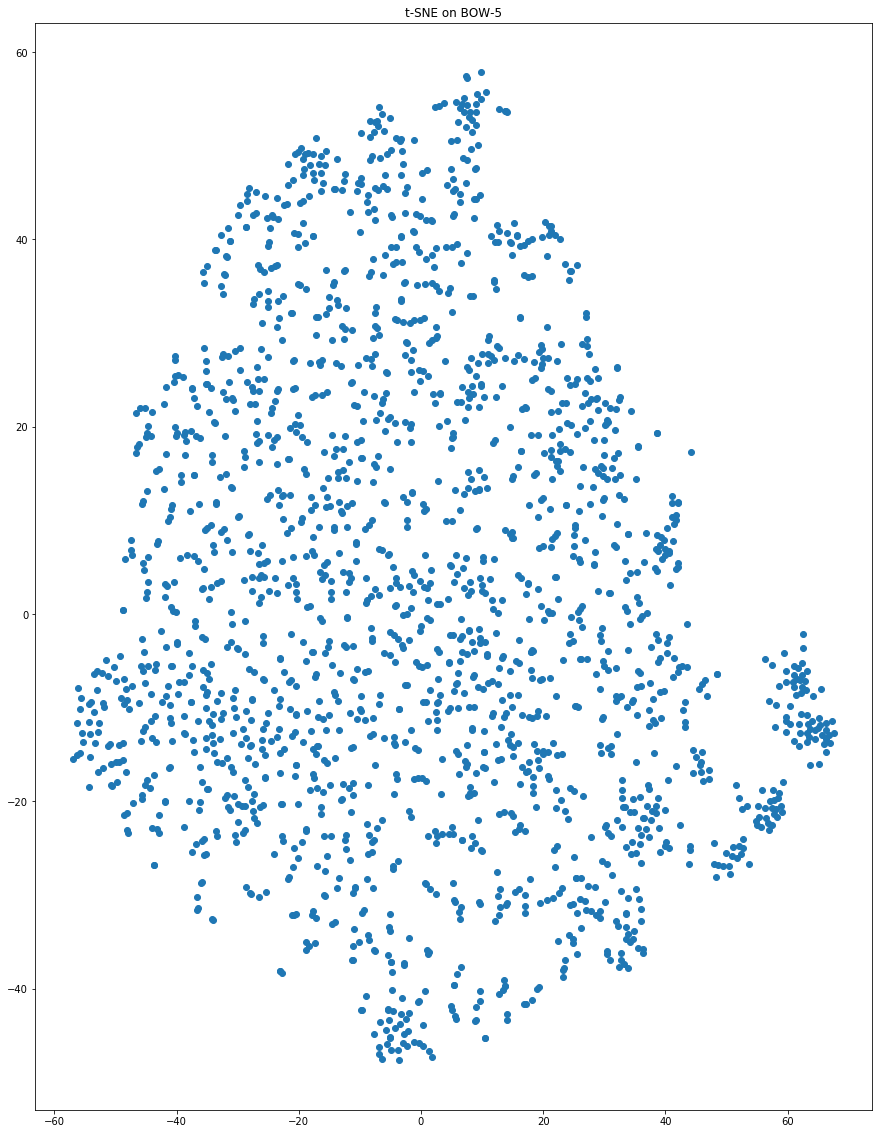

In [24]:
words_tsne, lowdim_tsne = reduce_dim(nouns, bow5_sim, "tsne")
plt.title("t-SNE on BOW-5")

Text(0.5,1,'BOW-5: Word Clusters - 250 words')

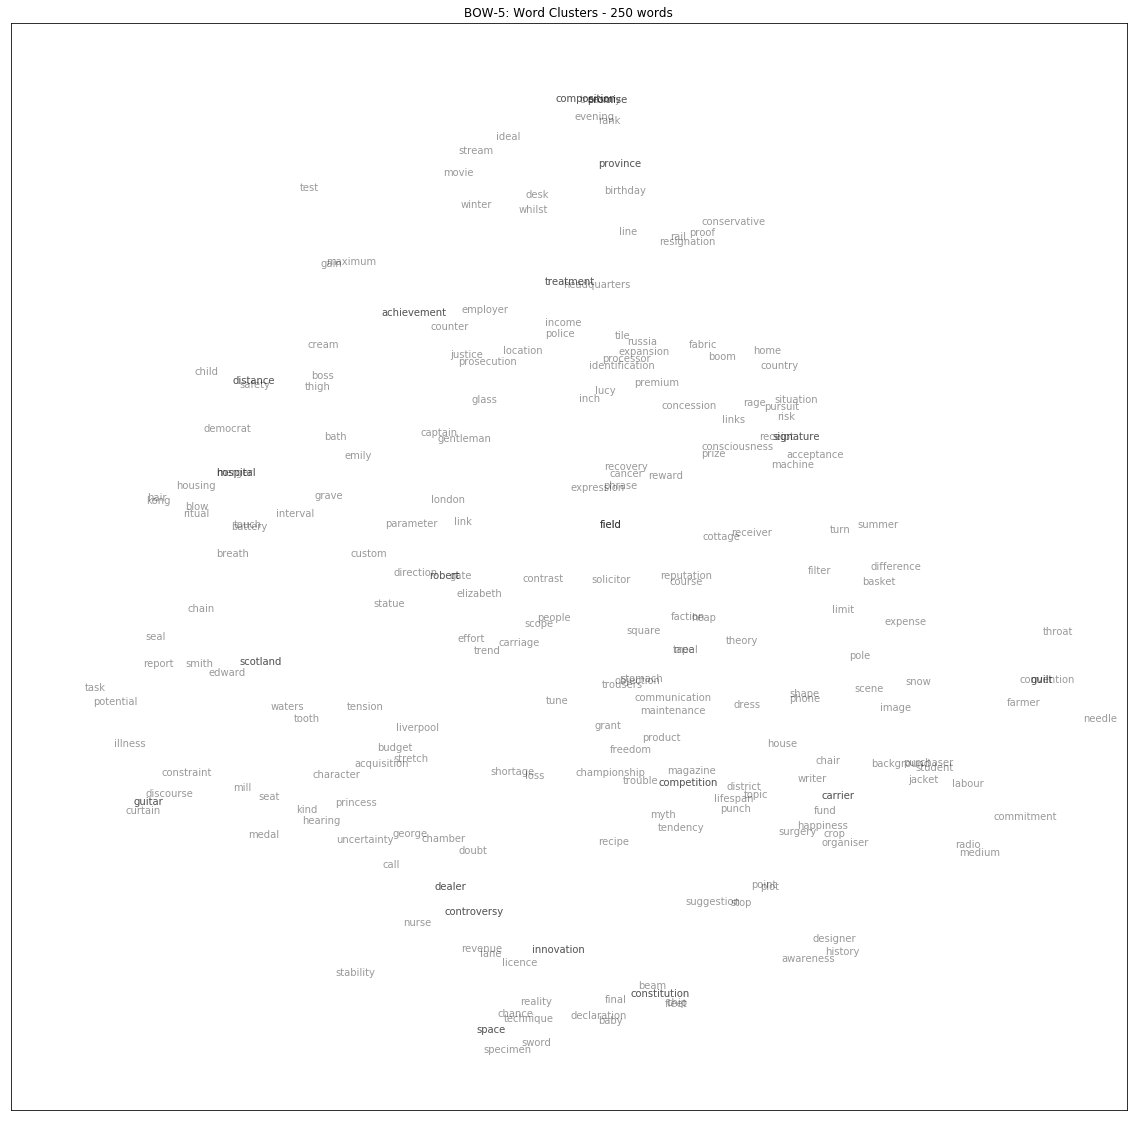

In [25]:
plot_word_clusters(words_tsne, lowdim_tsne, n_words=250)
plt.title("BOW-5: Word Clusters - 250 words")

Using t-SNE
Projecting to 50-dim space using PCA
	... done
Performing t-SNE
	... done


Text(0.5,1,'t-SNE on Dependencies')

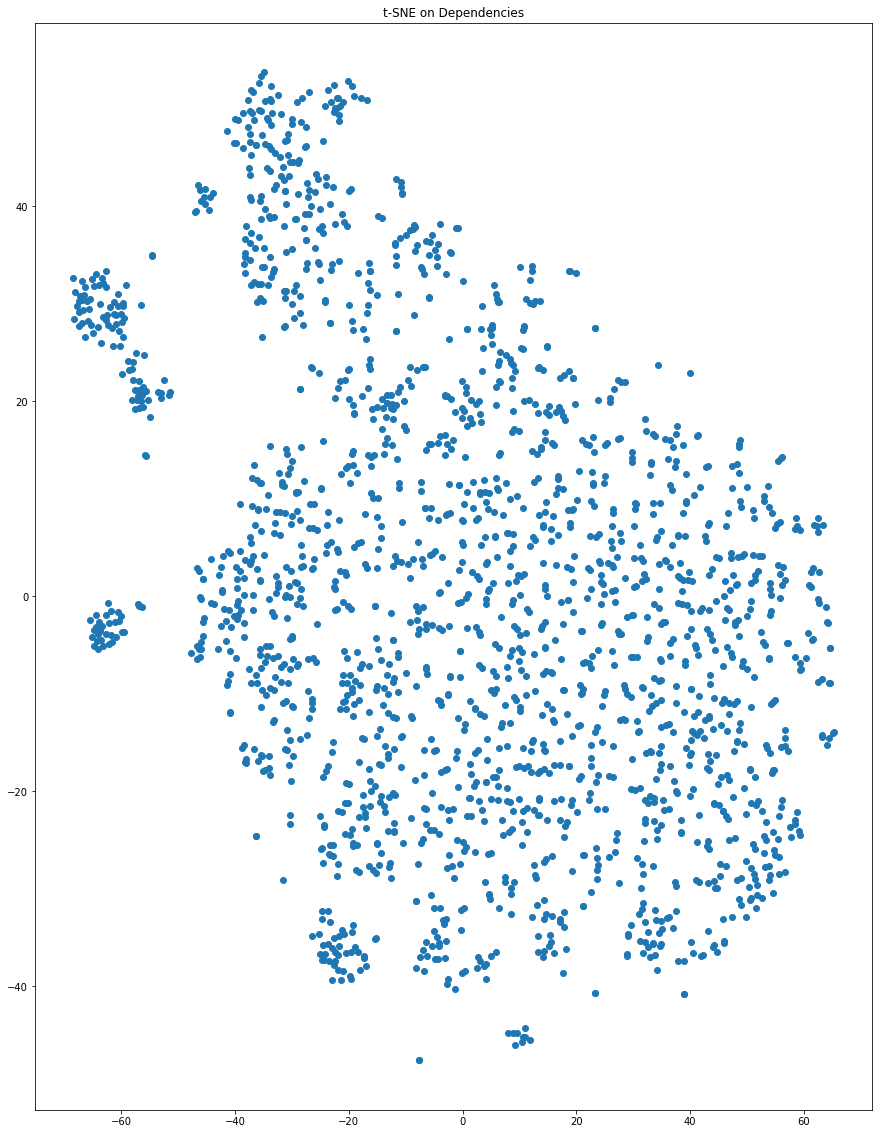

In [26]:
words_tsne, lowdim_tsne = reduce_dim(nouns, deps_sim, "tsne")
plt.title("t-SNE on Dependencies")

Text(0.5,1,'Deps: Word Clusters - 250 words')

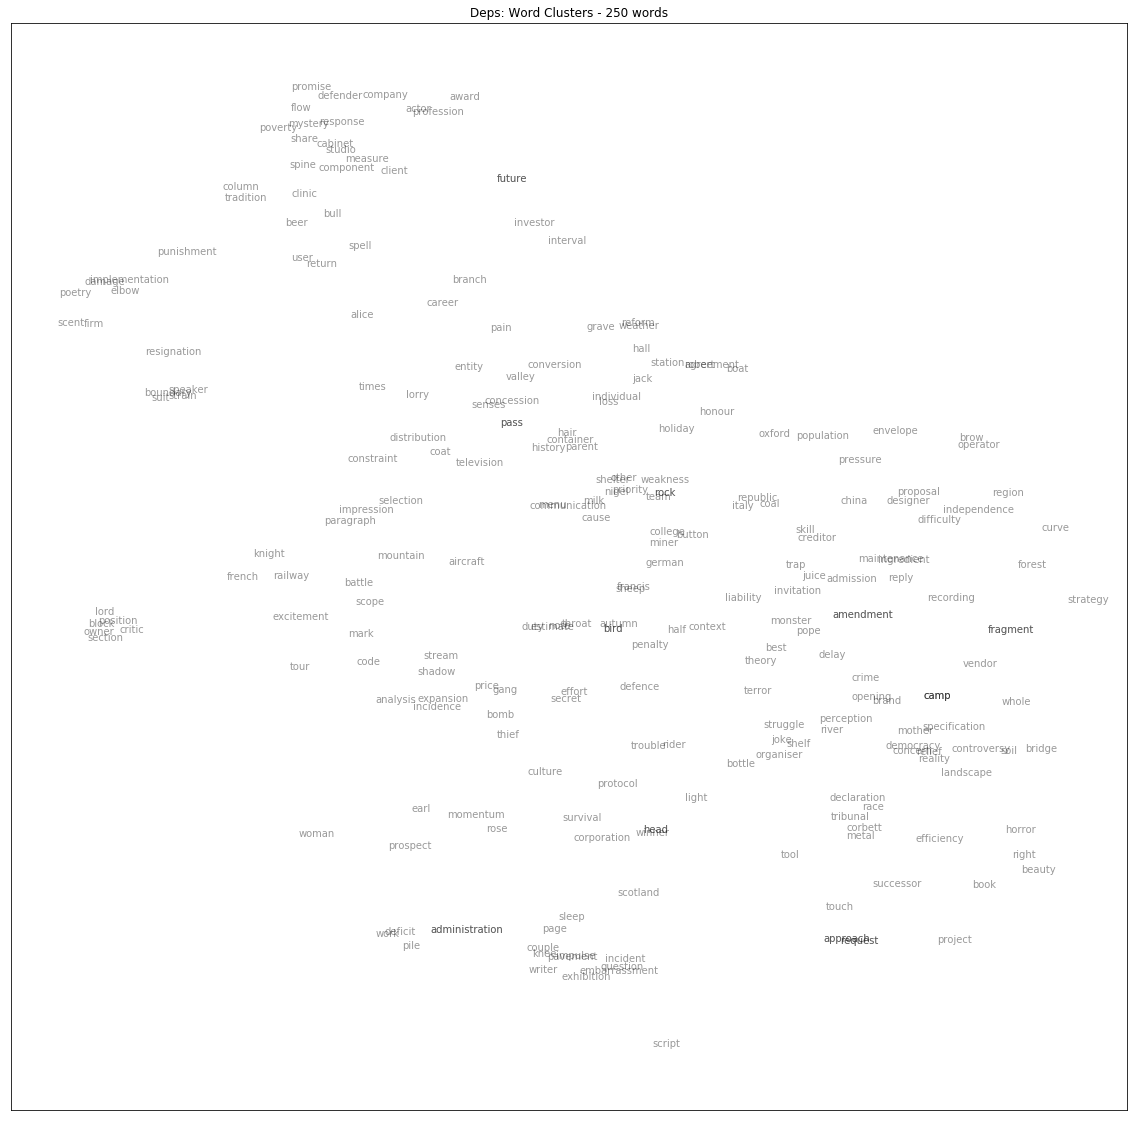

In [27]:
plot_word_clusters(words_tsne, lowdim_tsne, n_words=250)
plt.title("Deps: Word Clusters - 250 words")

## Clustering 

In [101]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
# TODO: Cite: http://scikit-learn.org/stable/modules/clustering.html
# Silhouettes: a Graphical Aid to the Interpretation and Validation of Cluster Analysis

In [115]:
def cluster_nouns(model, cluster_space):
    np.random.seed(42)
    words, matrix = model.get_word_index_matrix()
    
    best_score = 0.0
    best_model = 0.0
    
    for cluster in cluster_space:
        print("Trying Cluster Size: {}".format(cluster))
        model = KMeans(n_clusters=cluster, n_init=20, random_state=42, max_iter=1000, n_jobs=-1)
        model.fit(matrix) 
        labels = model.labels_        
        score = metrics.silhouette_score(matrix, labels)
        
        if score > best_score:
            best_score = score
            best_model = model
    
    print("Best score: ", best_score, "Best model: \n\t", best_model)
    
    return best_model.predict(matrix)
    

words, matrix = deps_sim.get_word_index_matrix()
deps_labels = cluster_nouns(deps_sim, [3, 5, 9, 15, 30])

words, matrix = bow2_sim.get_word_index_matrix()
bow2_labels = cluster_nouns(bow2_sim, [3, 5, 9, 15, 30, 45, 60])

words, matrix = bow5_sim.get_word_index_matrix()
bow5_labels = cluster_nouns(bow5_sim, [3, 5, 9, 15, 30, 45])

Trying Cluster Size: 3
Trying Cluster Size: 5
Trying Cluster Size: 9
Trying Cluster Size: 15
Trying Cluster Size: 30
Best score:  0.031748855151665006 Best model: 
	 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=5, n_init=20, n_jobs=-1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Trying Cluster Size: 3
Trying Cluster Size: 5
Trying Cluster Size: 9
Trying Cluster Size: 15
Trying Cluster Size: 30
Trying Cluster Size: 45
Trying Cluster Size: 60
Best score:  0.027271672411460047 Best model: 
	 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=60, n_init=20, n_jobs=-1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Trying Cluster Size: 3
Trying Cluster Size: 5
Trying Cluster Size: 9
Trying Cluster Size: 15
Trying Cluster Size: 30
Trying Cluster Size: 45
Best score:  0.036796128226677015 Best model: 
	 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_i

In [116]:
def sample_words(cluster_labels, words, n_samples=10):
    np.random.seed(42)
    # convert to numpy array for easier indexing
    words = np.array(words)
    for i in range(cluster_labels.max() + 1):
        print("Sampling from cluster: ", i)
        cluster_words = words[cluster_labels==i]
        if len(cluster_words) <= n_samples:
            choices = cluster_words
        else:
            choices = {random.choice(cluster_words) for _ in range(n_samples)}
        print("\t", end="")
        
        for word in choices:
            print(word, ", ", end="")
            
        print("...\n")

In [118]:
sample_words(bow2_labels, bow2_sim.get_word_index_matrix()[0], n_samples=30)

Sampling from cluster:  0
	tenant , acid , availability , britain , decision , metal , commission , willie , depth , script , attitude , taylor , cottage , henry , fabric , strategy , territory , prize , canal , ladder , doorway , willingness , ...

Sampling from cluster:  1
	collector , newspaper , luke , french , sort , preparation , mirror , parameter , person , trap , university , launch , wicket , diary , ambition , contempt , gold , ideology , stair , ...

Sampling from cluster:  2
	fall , approval , dialogue , curtain , handful , maker , author , star , pavement , passenger , analysis , climate , missile , television , friendship , question , honour , zone , diet , reputation , index , ...

Sampling from cluster:  3
	priority , mountain , plan , proposition , activity , camp , guide , tune , soul , shadow , outcome , bedroom , thief , coal , payment , back , field , champion , guidance , graham , promotion , intervention , conception , plenty , talk , ...

Sampling from cluster:

	accident , mark , stretch , criticism , family , constituency , tactic , context , article , individual , secretary , heart , occupation , brother , jane , vote , lily , suspicion , youth , villa , draw , sense , kingdom , instruction , office , charge , ...

Sampling from cluster:  49
	london , mouse , seal , delight , circle , truth , host , anger , smith , leaf , potato , accommodation , edward , israel , chart , picture , ankle , simon , johnson , tournament , event , guest , ridge , teenager , tonne , ...

Sampling from cluster:  50
	community , intensity , grin , dinner , practitioner , proceedings , apartment , tendency , pole , disappointment , band , offender , neighbour , brick , process , idea , right , comfort , debt , black , miller , valley , finding , credit , dancer , universe , snow , ...

Sampling from cluster:  51
	supporter , path , court , customer , throat , protest , flavour , tail , merit , chancellor , news , province , evening , treasury , loan , teaching , p

In [119]:
sample_words(bow5_labels, bow5_sim.get_word_index_matrix()[0], n_samples=30)

Sampling from cluster:  0
	resolution , warning , commitment , apple , architecture , hundred , sheet , tongue , club , scheme , enquiry , resistance , church , west , shaft , rate , furniture , worker , mood , arrest , string , slice , ...

Sampling from cluster:  1
	sand , discourse , grave , mungo , accident , feeling , search , circuit , health , criticism , round , status , society , employee , majority , benjamin , laugh , football , mirror , knife , tactic , parameter , shell , ...

Sampling from cluster:  2
	headline , contents , airline , glance , battle , dinner , ministry , prosecution , youngster , justice , average , let , component , strike , maker , routine , knot , glass , trade , bill , moment , grounds , spot , bulk , ...

Sampling from cluster:  3
	david , thigh , horizon , crime , slide , lily , hotel , angel , preparation , strip , creditor , commander , collector , fact , estimate , earl , blanche , crash , bucket , heaven , dawn , provision , look , tour , ...

S

In [120]:
sample_words(deps_labels, deps_sim.get_word_index_matrix()[0], n_samples=30)

Sampling from cluster:  0
	happiness , clinton , replacement , body , britain , engine , apartment , profession , strain , priest , lifetime , equation , resistance , waist , marie , stair , west , transformation , journal , discrimination , need , object , demand , seat , alliance , definition , carpet , best , implementation , ...

Sampling from cluster:  1
	milk , effect , acquisition , declaration , supplies , market , organization , youngster , consumer , drop , tide , rank , level , plane , sigh , institution , mortgage , sanction , staff , north , norm , trick , receipt , frequency , juice , tension , fleet , volunteer , writing , behaviour , ...

Sampling from cluster:  2
	corridor , ticket , anniversary , corpse , pollution , ireland , reserve , commitment , remains , room , investigation , cancer , laura , lamp , director , round , audience , mist , henry , novel , princess , mirror , phenomenon , event , performance , buyer , setting , experience , finance , ...

Sampling fr